<div style="
    padding: 20px;
    color: white;
    margin: 0;
    font-size: 300%;
    font-weight: 800;
    text-align: center;
    display: fill;
    border-radius: 60px;
    background-color: #D8D8D8;
    box-shadow: 0 4px 8px rgba(0, 0, 0, 0.2);
    text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.5);
">
    Toyota Motors Stock Data (1980-2024) <br>
    (EDA / Machine learning)
</div>

# **<div style="display: inline-block; border: 5px solid blue; padding: 15px 10px; border-radius: 5px; font-size: 35px;"> Project. Toyota Motors Stock</div>**


## Goal
> ## EDA : Column Analysis, Column Correlation Analysis
> ## Modeling : Predicting Close

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Import Libraries & Read Dataset</div>

In [1]:
# For EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
df = pd.read_csv('/kaggle/input/toyota-motors-stock-data-2980-2024/Toyota_Data.csv')
df.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       11291 non-null  object 
 1   Adj Close  11291 non-null  float64
 2   Close      11291 non-null  float64
 3   High       11291 non-null  float64
 4   Low        11291 non-null  float64
 5   Open       11291 non-null  float64
 6   Volume     11291 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 617.6+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,11291.0,63.586275,52.272225,2.259452,19.224636,50.583900,104.705669,2.547700e+02
Close,11291.0,72.057776,51.295776,3.237711,27.548208,66.040001,114.295002,2.547700e+02
High,11291.0,72.478879,51.552662,3.237711,27.735613,66.650002,114.895000,2.552300e+02
Low,11291.0,71.646418,50.976716,3.237711,27.548208,65.440002,113.625000,2.535900e+02
Open,11291.0,67.955424,55.851523,0.000000,0.000000,66.000000,114.294998,2.550000e+02
Volume,11291.0,214660.442653,387425.599372,0.000000,13500.000000,91000.000000,292300.000000,1.858270e+07


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Data preprocessing</div>

In [5]:
print("Missing Value (%)")
missing_values = df.isna().mean() * 100
print(missing_values)

print("\nDuplicate Rows (%):")
duplicate_count = df.duplicated().mean()
print(duplicate_count)

Missing Value (%)
Date         0.0
Adj Close    0.0
Close        0.0
High         0.0
Low          0.0
Open         0.0
Volume       0.0
dtype: float64

Duplicate Rows (%):
0.0


In [6]:
def outlier_check(row, colname):  
    Q1 = row[colname].quantile(0.25)
    Q3 = row[colname].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5 * IQR
    upper_b = Q3 + 1.5 * IQR
    outlier = row.loc[(row[colname] < lower_b) | (row[colname] > upper_b)]
    return outlier
    
outliers = pd.DataFrame() 

for col in df.select_dtypes(include=['number']).columns: 
    outliers_in_col = outlier_check(df, col) 
    outliers = pd.concat([outliers, outliers_in_col])

outliers.reset_index(drop=True, inplace=True)
outliers

,Date,Adj Close,Close,High,Low,Open,Volume
0,2024-02-22,234.449997,234.449997,235.149994,233.009995,234.169998,461300
1,2024-02-23,235.000000,235.000000,235.759995,234.339996,235.000000,279000
2,2024-02-26,238.130005,238.130005,238.779999,236.539993,237.589996,332900
3,2024-02-27,238.039993,238.039993,238.839996,236.589996,238.190002,301000
4,2024-02-28,237.289993,237.289993,238.190002,237.000000,237.929993,168700
...,...,...,...,...,...,...,...
755,2024-08-01,179.070007,179.070007,184.679993,178.570007,181.570007,820900
756,2024-08-05,168.350006,168.350006,170.949997,159.039993,160.889999,1023900
757,2024-10-15,169.550003,169.550003,171.679993,169.309998,171.610001,858900
758,2024-12-26,197.360001,197.360001,198.000000,193.130005,195.970001,1281200


### I do not remove outliers because it is a stock price forecast

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">EDA : Data Distribution</div>

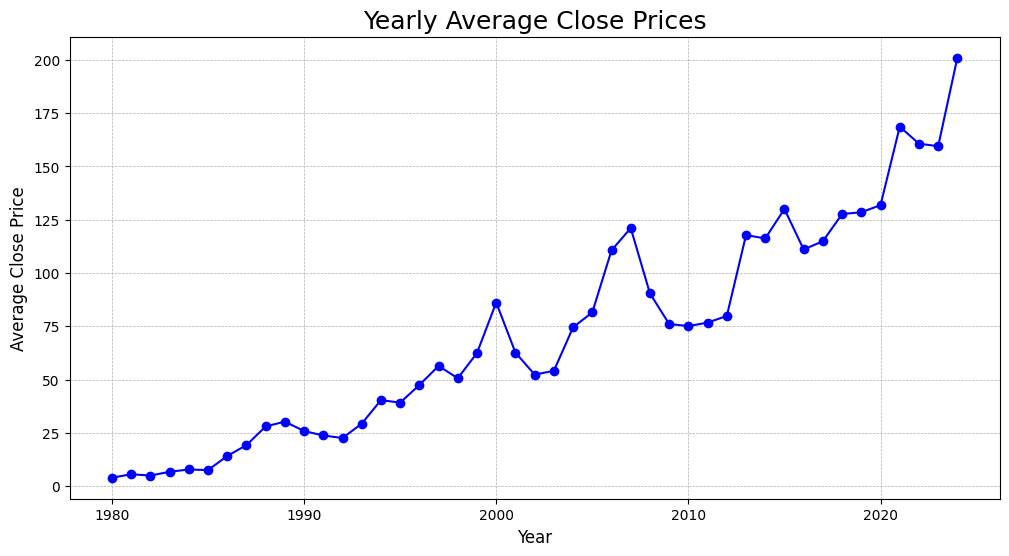

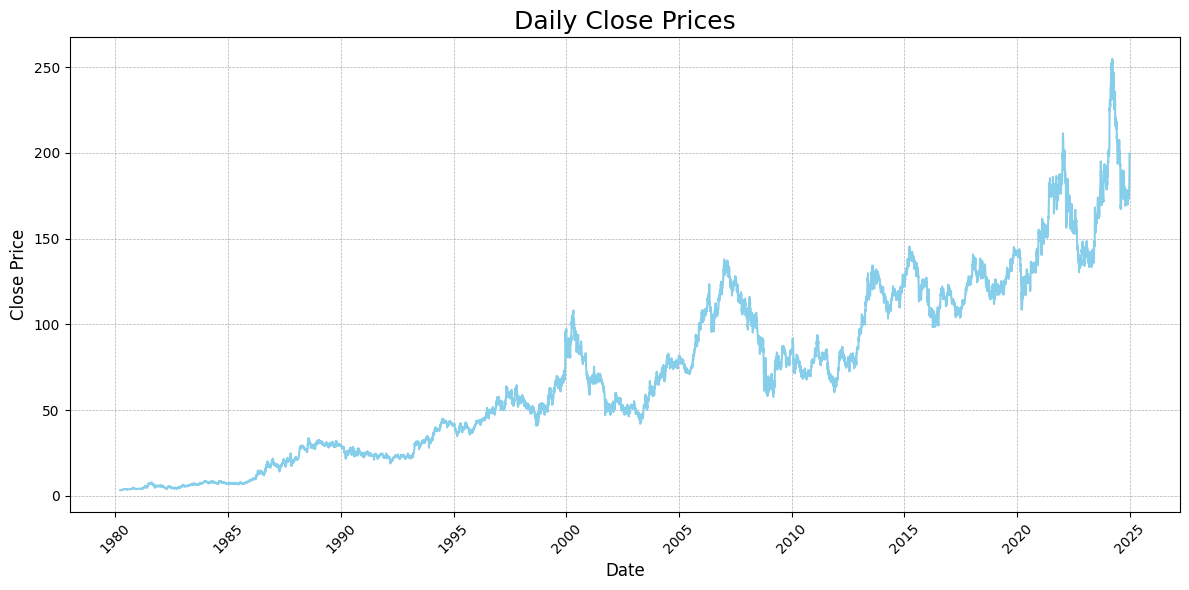

In [7]:
df["Date"] = pd.to_datetime(df["Date"], utc=True)  
df["Date"] = df["Date"].dt.tz_convert(None)  

df["Year"] = df["Date"].dt.year
yearly_data = df.groupby("Year")["Close"].mean()
daily_data = df.groupby("Date")["Close"].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data.values, marker="o", color="blue")
plt.title("Yearly Average Close Prices", fontsize=18)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Close Price", fontsize=12)
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(daily_data.index, daily_data.values, color="skyblue")
plt.title("Daily Close Prices", fontsize=18)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Close Price", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Comparison of regression model performance</div>

In [8]:
X = df[['Adj Close','High','Low','Open','Volume']]
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, tol=1e-4),  
    "SVR": SVR(kernel='rbf', C=1.0, epsilon=0.1),
    "KNN": KNeighborsRegressor(n_neighbors=3),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "Bayesian Ridge": BayesianRidge(),
    "Polynomial Regression": make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
    "MLP Regressor": MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
}

def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    mse = mean_squared_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)  
    
    return mse, r2

In [9]:
results = {}

for name, model in models.items():
    mse, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "R²": r2}

results_df = pd.DataFrame(results).T
results_df = results_df.sort_values(by="R²", ascending=False)

results_df

,MSE,R²
Random Forest,1.056868e-01,0.999960
Polynomial Regression,1.123296e-01,0.999958
Bayesian Ridge,1.488219e-01,0.999944
Linear Regression,1.488223e-01,0.999944
Decision Tree,1.819912e-01,0.999932
ElasticNet,2.588031e-01,0.999903
XGBoost,7.788339e-01,0.999708
KNN,7.892241e+02,0.704590
SVR,1.182094e+03,0.557538
MLP Regressor,9.932120e+06,-3716.633002


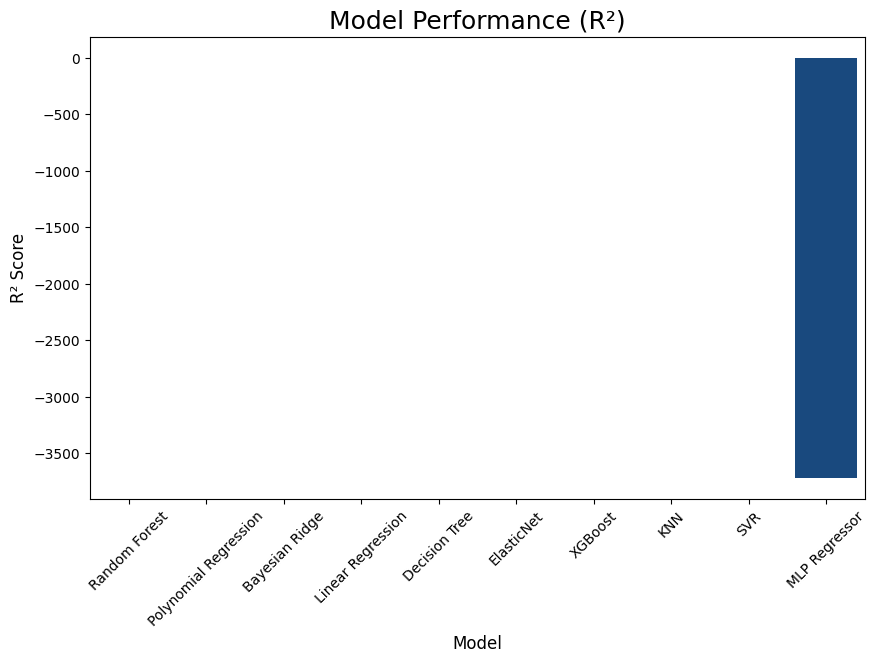

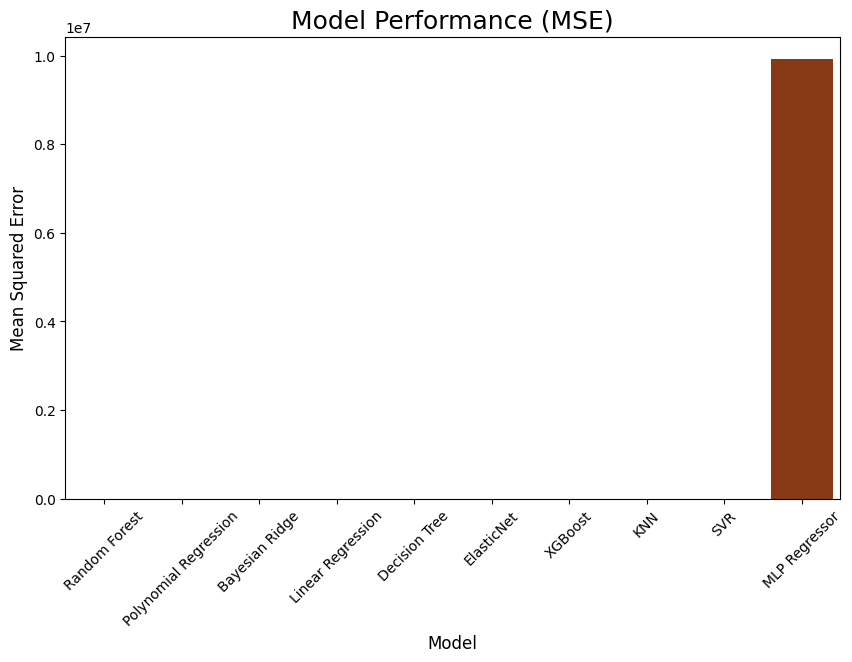

Best Model:
MSE    0.105687
R²     0.999960
Name: Random Forest, dtype: float64


In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="R²", data=results_df, palette="Blues")
plt.title("Model Performance (R²)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x=results_df.index, y="MSE", data=results_df, palette="Oranges")
plt.title("Model Performance (MSE)", fontsize=18)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.xticks(rotation=45)
plt.show()

best_model = results_df.loc[results_df["R²"].idxmax()]
print("Best Model:")
print(best_model)


# <div style="display: inline-block; padding: 20px 20px; border-radius: 15px; background: linear-gradient(135deg, #d8bfd8, #8b008b); box-shadow: 3px 3px 8px rgba(0, 0, 0, 0.2); font-size: 35px; font-family: Arial, sans-serif; color: #ffffff; text-align: center;">Conclusion</div>

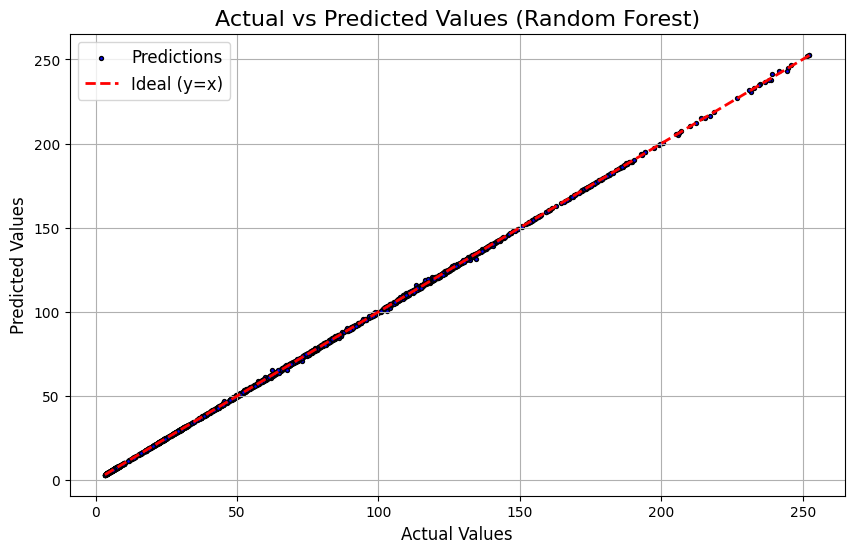

Random Forest Regression Result: MSE = 0.10568678993390715, R² = 0.9999604410024534


In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', s=8, edgecolor='black', label='Predictions')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Ideal (y=x)')

plt.title('Actual vs Predicted Values (Random Forest)', fontsize=16)
plt.xlabel('Actual Values', fontsize=12)
plt.ylabel('Predicted Values', fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Random Forest Regression Result: MSE = {mse}, R² = {r2}')

<div style="display: inline-block; padding: 10px 15px; border-radius: 20px; background: linear-gradient(135deg, #ff7f50, #ff1493); box-shadow: 5px 5px 15px rgba(0, 0, 0, 0.3); font-size: 30px; font-family: 'Helvetica Neue', Arial, sans-serif; color: #ffffff; text-align: center; border: 2px solid #ffffff;">Thanks !</div><br><br>

### If you have any questions, please feel free to ask me a question and use the code freely !

<a href="https://www.kaggle.com/lko9911" target="_blank" style="display: inline-block; background-color: #3a86ff; color: #fff; text-decoration: none; padding: 5px 10px; border-radius: 10px; margin: 15px; font-size: 25px;">Kaggle</a>
<a href="https://github.com/lko9911" target="_blank" style="display: inline-block; background-color: #ff8c00; color: #ffffff; text-decoration: none; padding: 5px 20px; border-radius: 15px; margin: 15px; border: 2px solid #ff4500; font-size: 25px; font-family: 'Arial', sans-serif; font-weight: bold; transition: all 0.3s ease;">GitHub</a>